In [1]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\User\Documents\GitHub\project_3


In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

In [3]:
db_file_path = "C:/Users/User/Documents/GitHub/project_3/merged_cohorts_df.db"
engine = create_engine(f"sqlite:///{db_file_path}")

In [4]:
csv_file_path = "C:/Users/User/Documents/GitHub/project_3/merged_cohorts_df.csv"
df = pd.read_csv(csv_file_path)

In [5]:
import pandas as pd
from sqlalchemy import create_engine, text
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# Define paths
csv_file_path = "C:/Users/User/Documents/GitHub/project_3/merged_cohorts_df.csv"
db_file_path = "C:/Users/User/Documents/GitHub/project_3/merged_cohorts_df.db"

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Step 2: Create a SQLite database
engine = create_engine(f"sqlite:///{db_file_path}")

# Step 3: Write the DataFrame to the SQLite database
df.to_sql("cohorts", con=engine, if_exists="replace", index=False)

# Step 4: Verify the data
try:
    with engine.connect() as connection:
        result = connection.execute(text("SELECT * FROM cohorts LIMIT 5;"))
        for row in result:
            print(row)
except Exception as e:
    print("Connection failed:", e)

Current Working Directory: c:\Users\User\Documents\GitHub\project_3
('Chinle Unified District', 4737, 'Chinle High School', 'Apache', 'ELL Cohort', '*', '*', '43.75')
('Chinle Unified District', 4737, 'Chinle High School', 'Apache', 'All', '180', '247', '72.87')
('Chinle Unified District', 4737, 'Chinle High School', 'Apache', 'Male', '78', '118', '66.1')
('Chinle Unified District', 4737, 'Chinle High School', 'Apache', 'Homeless Cohort', '*', '*', '*')
('Chinle Unified District', 4737, 'Chinle High School', 'Apache', 'Female', '102', '129', '79.07')


In [6]:
Base = declarative_base()

C:\Users\User\AppData\Local\Temp\ipykernel_44252\4196137762.py:1: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [7]:
# Define the model (table) for graduation data
class GraduationData(Base):
    __tablename__ = 'graduation_data'

    id = Column(Integer, primary_key=True)
    lea_name = Column(String, nullable=False)
    school_entity_id = Column(String, nullable=False)
    school_name = Column(String, nullable=False)
    county = Column(String, nullable=False)
    subgroup = Column(String)
    number_graduated = Column(Integer)
    number_in_cohort = Column(Integer)
    percent_graduated_4_years = Column(Float)
    cohort_year = Column(Integer)


In [8]:

# Create the table in the database if it doesn't exist
Base.metadata.create_all(engine)


In [9]:

# Create a new session
Session = sessionmaker(bind=engine)
session = Session()


In [10]:

# Function to add graduation data
def add_graduation_data(data):
    for record in data:
        graduation_record = GraduationData(
            lea_name=record['LEA Name'],
            school_entity_id=record['School Entity ID'],
            school_name=record['School Name'],
            county=record['County'],
            subgroup=record['Subgroup'],
            number_graduated=record['Number Graduated'],
            number_in_cohort=record['Number in Cohort'],
            percent_graduated_4_years=record['Percent Graduated in 4 Years']
        )
        session.add(graduation_record)
    session.commit()

In [11]:
# Convert the DataFrame to a list of dictionaries
actual_graduation_data = df.to_dict(orient='records')

In [12]:
print(df.columns)

Index(['LEA Name', 'School Entity ID', 'School Name', 'County', 'Subgroup',
       'Number Graduated', 'Number in Cohort', 'Percent Graduated in 4 Years'],
      dtype='object')


In [13]:
# Simulating actual graduation data (this could be replaced with real input)
actual_graduation_data = [
    {
        'LEA Name': 'District A',
        'School Entity ID': '001',
        'School Name': 'High School A',
        'County': 'County A',
        'Subgroup': 'All Students',
        'Number Graduated': 150,
        'Number in Cohort': 160,
        'Percent Graduated in 4 Years': 93.75,
        'Cohort Year': 2022
    },
    {
        'LEA Name': 'District B',
        'School Entity ID': '002',
        'School Name': 'High School B',
        'County': 'County B',
        'Subgroup': 'All Students',
        'Number Graduated': 120,
        'Number in Cohort': 130,
        'Percent Graduated in 4 Years': 92.31,
        'Cohort Year': 2022
    }
]


In [ ]:

# Add actual graduation data to the database
add_graduation_data(actual_graduation_data)

# Fetch data for visualization
data = session.query(GraduationData).all()
school_names = [record.school_name for record in data]
percent_graduated = [record.percent_graduated_4_years for record in data]

# Close the session
session.close()


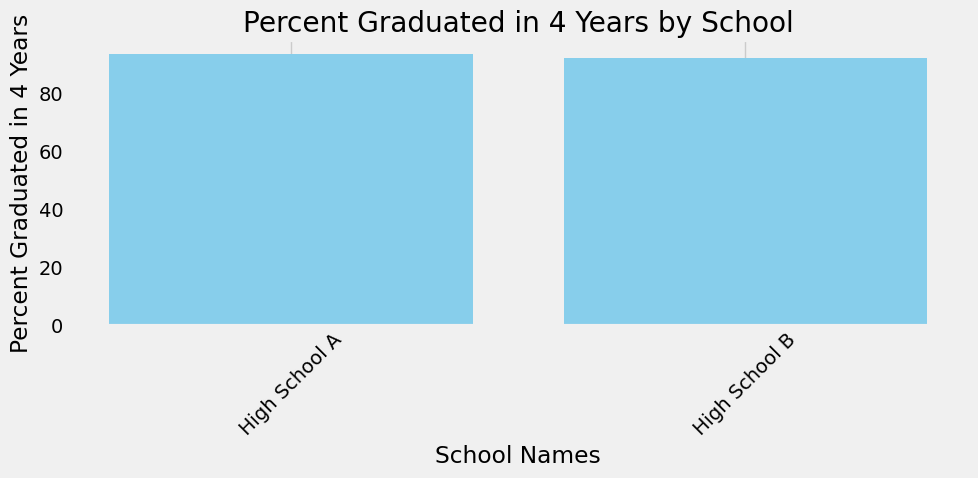

In [15]:

# Visualize data using Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(school_names, percent_graduated, color='skyblue')
plt.title('Percent Graduated in 4 Years by School')
plt.xlabel('School Names')
plt.ylabel('Percent Graduated in 4 Years')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()